In [126]:
import pandas as pd
import numpy as np
import chardet
from datetime import datetime

from google.colab import drive
drive.mount('/content/drive', True) #montando a unidade do google drive | #mounting google drive
OutPath = "/content/drive/MyDrive/Colab Notebooks/2. SINAN - Nacional/1.4 Resultados e-ou arquivos de saída/"

%matplotlib inline

Mounted at /content/drive


In [127]:
filePathAndName = "/content/drive/MyDrive/Colab Notebooks/2. SINAN - Nacional/1.1 Base de dados/SinanPreprocessed_uf.csv" #local onde está o arquivo a ser lido | #location where the file to be read is
with open(filePathAndName, 'rb') as f:
    result = chardet.detect(f.read())  # or readline if the file is large

dfSINAN = pd.read_csv(filePathAndName, sep=';', encoding = "UTF-8", error_bad_lines=False, index_col=None)
print(dfSINAN.columns.values)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


['DT_NOTIFIC' 'CS_SEXO' 'CS_RACA' 'TRATAMENTO' 'RAIOX_TORA' 'TESTE_TUBE'
 'FORMA' 'AGRAVAIDS' 'AGRAVALCOO' 'AGRAVDIABE' 'AGRAVDOENC' 'AGRAVOUTRA'
 'BACILOSC_E' 'BACILOS_E2' 'BACILOSC_O' 'CULTURA_ES' 'HIV' 'RIFAMPICIN'
 'ISONIAZIDA' 'ETAMBUTOL' 'ESTREPTOMI' 'PIRAZINAMI' 'ETIONAMIDA' 'OUTRAS'
 'TRAT_SUPER' 'DOENCA_TRA' 'SG_UF_AT' 'BACILOSC_1' 'BACILOSC_2'
 'BACILOSC_3' 'BACILOSC_4' 'BACILOSC_5' 'BACILOSC_6' 'SITUA_ENCE'
 'AGRAVDROGA' 'AGRAVTABAC' 'UF' 'DIAS' 'IDADE']


In [128]:
dfSINAN.shape

(964099, 39)

In [129]:
dfSINAN.head()

,DT_NOTIFIC,CS_SEXO,CS_RACA,TRATAMENTO,RAIOX_TORA,TESTE_TUBE,FORMA,AGRAVAIDS,AGRAVALCOO,AGRAVDIABE,...,BACILOSC_3,BACILOSC_4,BACILOSC_5,BACILOSC_6,SITUA_ENCE,AGRAVDROGA,AGRAVTABAC,UF,DIAS,IDADE
0,2001-01-06,1,9.0,1.0,1.0,4.0,1.0,9.0,9.0,9.0,...,9.0,3.0,9.0,3.0,1.0,9.0,9.0,AC,195,66.0
1,2001-01-16,0,4.0,1.0,1.0,4.0,1.0,9.0,9.0,9.0,...,9.0,3.0,9.0,3.0,1.0,9.0,9.0,AC,181,35.0
2,2001-01-16,1,4.0,1.0,1.0,4.0,1.0,9.0,9.0,9.0,...,9.0,3.0,9.0,3.0,1.0,9.0,9.0,AC,181,54.0
3,2001-01-22,1,4.0,1.0,1.0,4.0,1.0,9.0,9.0,9.0,...,9.0,3.0,9.0,3.0,1.0,9.0,9.0,AC,181,36.0
4,2001-01-03,0,9.0,1.0,4.0,4.0,1.0,9.0,9.0,9.0,...,9.0,3.0,9.0,3.0,1.0,9.0,9.0,AC,183,14.0


In [8]:
dfSINAN['DT_NOTIFIC'] = pd.to_datetime(dfSINAN['DT_NOTIFIC'])
dfSINAN['year'] = dfSINAN['DT_NOTIFIC'].dt.year

In [9]:
dfSINAN.head()

,DT_NOTIFIC,CS_SEXO,CS_RACA,TRATAMENTO,RAIOX_TORA,TESTE_TUBE,FORMA,AGRAVAIDS,AGRAVALCOO,AGRAVDIABE,...,codigo_ibge,nome,latitude,longitude,capital,codigo_uf,uf,DIAS,IDADE,year
0,2001-01-06,1,9.0,1.0,1.0,4.0,1.0,9.0,9.0,9.0,...,1200104.0,Brasiléia,-10.995,-68.7497,0.0,12.0,AC,195,66.0,2001
1,2001-01-16,0,4.0,1.0,1.0,4.0,1.0,9.0,9.0,9.0,...,1200104.0,Brasiléia,-10.995,-68.7497,0.0,12.0,AC,181,35.0,2001
2,2001-01-16,1,4.0,1.0,1.0,4.0,1.0,9.0,9.0,9.0,...,1200104.0,Brasiléia,-10.995,-68.7497,0.0,12.0,AC,181,54.0,2001
3,2001-01-22,1,4.0,1.0,1.0,4.0,1.0,9.0,9.0,9.0,...,1200104.0,Brasiléia,-10.995,-68.7497,0.0,12.0,AC,181,36.0,2001
4,2001-01-03,0,9.0,1.0,4.0,4.0,1.0,9.0,9.0,9.0,...,1200104.0,Brasiléia,-10.995,-68.7497,0.0,12.0,AC,183,14.0,2001


In [13]:
df2 = dfSINAN.groupby(by=["year","SITUA_ENCE"]).count()['DT_NOTIFIC']

In [27]:
df2 = df2.rename(index={1:'CURED', 3:'DIED'}, level='SITUA_ENCE')
df2

year  SITUA_ENCE
2001  CURED         39894
      DIED             66
2002  CURED         43909
      DIED             61
2003  CURED         46897
      DIED             96
2004  CURED         47214
      DIED            117
2005  CURED         49459
      DIED            329
2006  CURED         48273
      DIED           1115
2007  CURED         46326
      DIED           2503
2008  CURED         47144
      DIED           2411
2009  CURED         47022
      DIED           2458
2010  CURED         45273
      DIED           2451
2011  CURED         46896
      DIED           2240
2012  CURED         44423
      DIED           2461
2013  CURED         44934
      DIED           2411
2014  CURED         58473
      DIED           2895
2015  CURED         57170
      DIED           2904
2016  CURED         57859
      DIED           2693
2017  CURED         60928
      DIED           3099
2018  CURED         61839
      DIED           3077
2019  CURED         33935
      DIED           

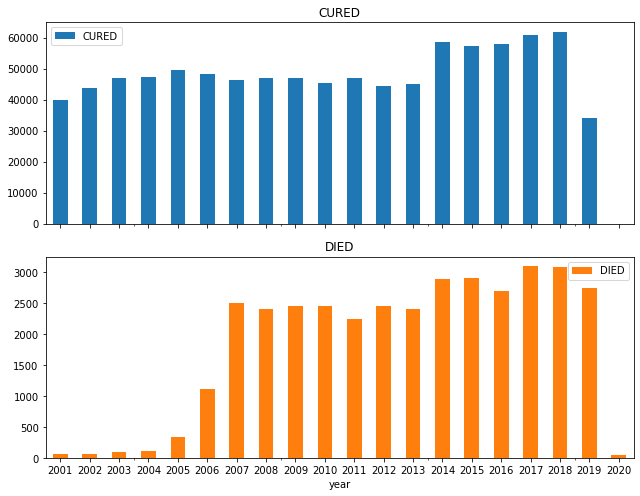

In [29]:
import matplotlib.pyplot as plt
ax = df2.unstack(level=1).plot(kind='bar', subplots=True, rot=0, figsize=(9, 7))
plt.tight_layout()



In [64]:
df3 = dfSINAN.groupby(by=["uf",'SITUA_ENCE']).count()['DT_NOTIFIC']
df3 = df3.rename(index={1:'CURED', 3:'DIED'}, level='SITUA_ENCE')
df3

uf  SITUA_ENCE
AC  CURED           6259
    DIED             130
AL  CURED          16597
    DIED             867
AM  CURED          37965
    DIED            1522
AP  CURED           3149
    DIED              61
BA  CURED          78902
    DIED            2568
CE  CURED          53666
    DIED            1677
DF  CURED           6751
    DIED             135
ES  CURED          20068
    DIED             761
GO  CURED          12802
    DIED             536
MA  CURED          35004
    DIED            1140
MG  CURED          61028
    DIED            2449
MS  CURED          13050
    DIED             592
MT  CURED          17578
    DIED             434
PA  CURED          51839
    DIED            1177
PB  CURED          15688
    DIED             579
PE  CURED          62062
    DIED            3567
PI  CURED          13467
    DIED             452
PR  CURED          38015
    DIED            1412
RJ  CURED         160583
    DIED            7912
RN  CURED          14483
    DIED  

In [65]:
now = datetime.now() # current date and time
date_time = now.strftime("%m-%d-%Y_%H-%M-%S")

print("date and time:",date_time)
df3.to_csv("../"+OutPath+'UF'+date_time+'.csv', encoding='utf-8')

date and time: 09-20-2022_12-45-22


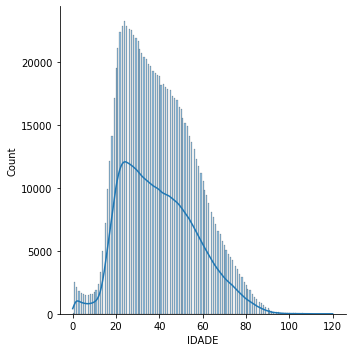

In [98]:
import seaborn as sns
p = sns.displot(dfSINAN, x="IDADE", kde=True)

In [108]:
dfSINAN.loc[dfSINAN['SITUA_ENCE'] == 1, 'SITUA_ENCE'] = "CURED"
dfSINAN.loc[dfSINAN['SITUA_ENCE'] == 3, 'SITUA_ENCE'] = "DIED"

dfSINAN.loc[dfSINAN['CS_SEXO'] == 0, 'CS_SEXO'] = "Female"
dfSINAN.loc[dfSINAN['CS_SEXO'] == 1, 'CS_SEXO'] = "Male"
dfSINAN.loc[dfSINAN['CS_SEXO'] == 2, 'CS_SEXO'] = "Undefined"

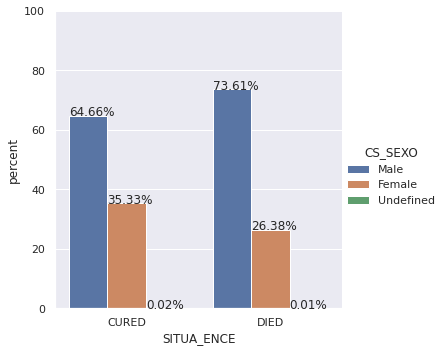

In [110]:
import numpy as np
import pandas as pd
import seaborn as sns

x,y = 'SITUA_ENCE', 'CS_SEXO'

df1 = dfSINAN.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

In [124]:
df = dfSINAN # seu DataFrame aqui
faixas_etarias = np.arange(0, df['IDADE'].max()+1, 20)
df['Age group'] = pd.cut(df['IDADE'], faixas_etarias)


# A partir daqui, use `df.groupby` para agrupar pela coluna 'faixa_etaria'
df_agrupado = df.groupby(by=["Age group","SITUA_ENCE"]).count()['DT_NOTIFIC']
df_agrupado.head(100)

Age group       SITUA_ENCE
(0.0, 20.0]     CURED         109313
                DIED            1046
(20.0, 40.0]    CURED         412723
                DIED            9286
(40.0, 60.0]    CURED         292294
                DIED           14349
(60.0, 80.0]    CURED         102845
                DIED            9313
(80.0, 100.0]   CURED          10524
                DIED            2167
(100.0, 120.0]  CURED            132
                DIED              21
Name: DT_NOTIFIC, dtype: int64

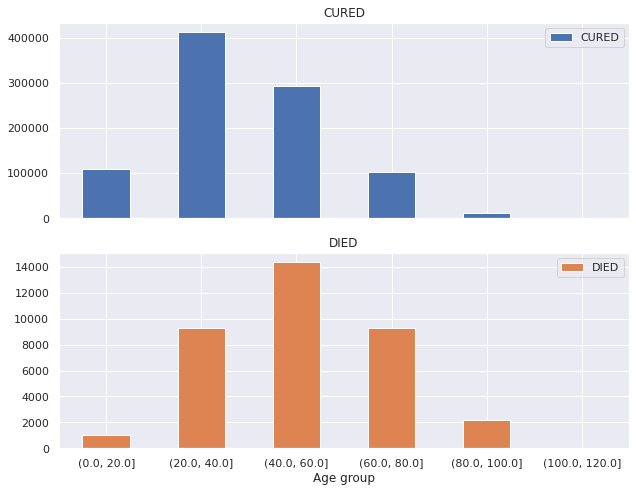

In [125]:
ax = df_agrupado.unstack(level=1).plot(kind='bar', subplots=True, rot=0, figsize=(9, 7))
plt.tight_layout()